<a href="https://colab.research.google.com/github/BachokunIAR/pytorch/blob/main/irish_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from sklearn.datasets import load_iris
import seaborn as sns
#from google.colab import files


In [ ]:
#upload = files.upload()
#data = load_iris()

#data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
      # using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
data =  pd.read_csv(csv_url, names = col_names)


In [ ]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['Class'] = data['Class'].map({'Iris-setosa': 0,
                                   'Iris-versicolor': 1,
                                   'Iris-virginica':2})
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


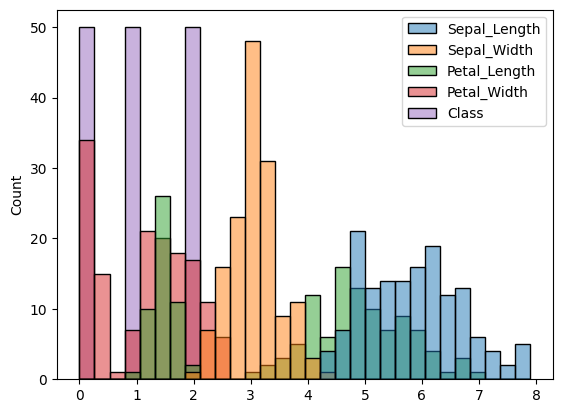

In [ ]:
sns.histplot(data = data, bins = 30);

In [ ]:
#sns.heatmap(data , annot = True,fmt='.2f') #Not informative here
#plt.rcParams['figure.figsize']=[15,15]
#data.hist();

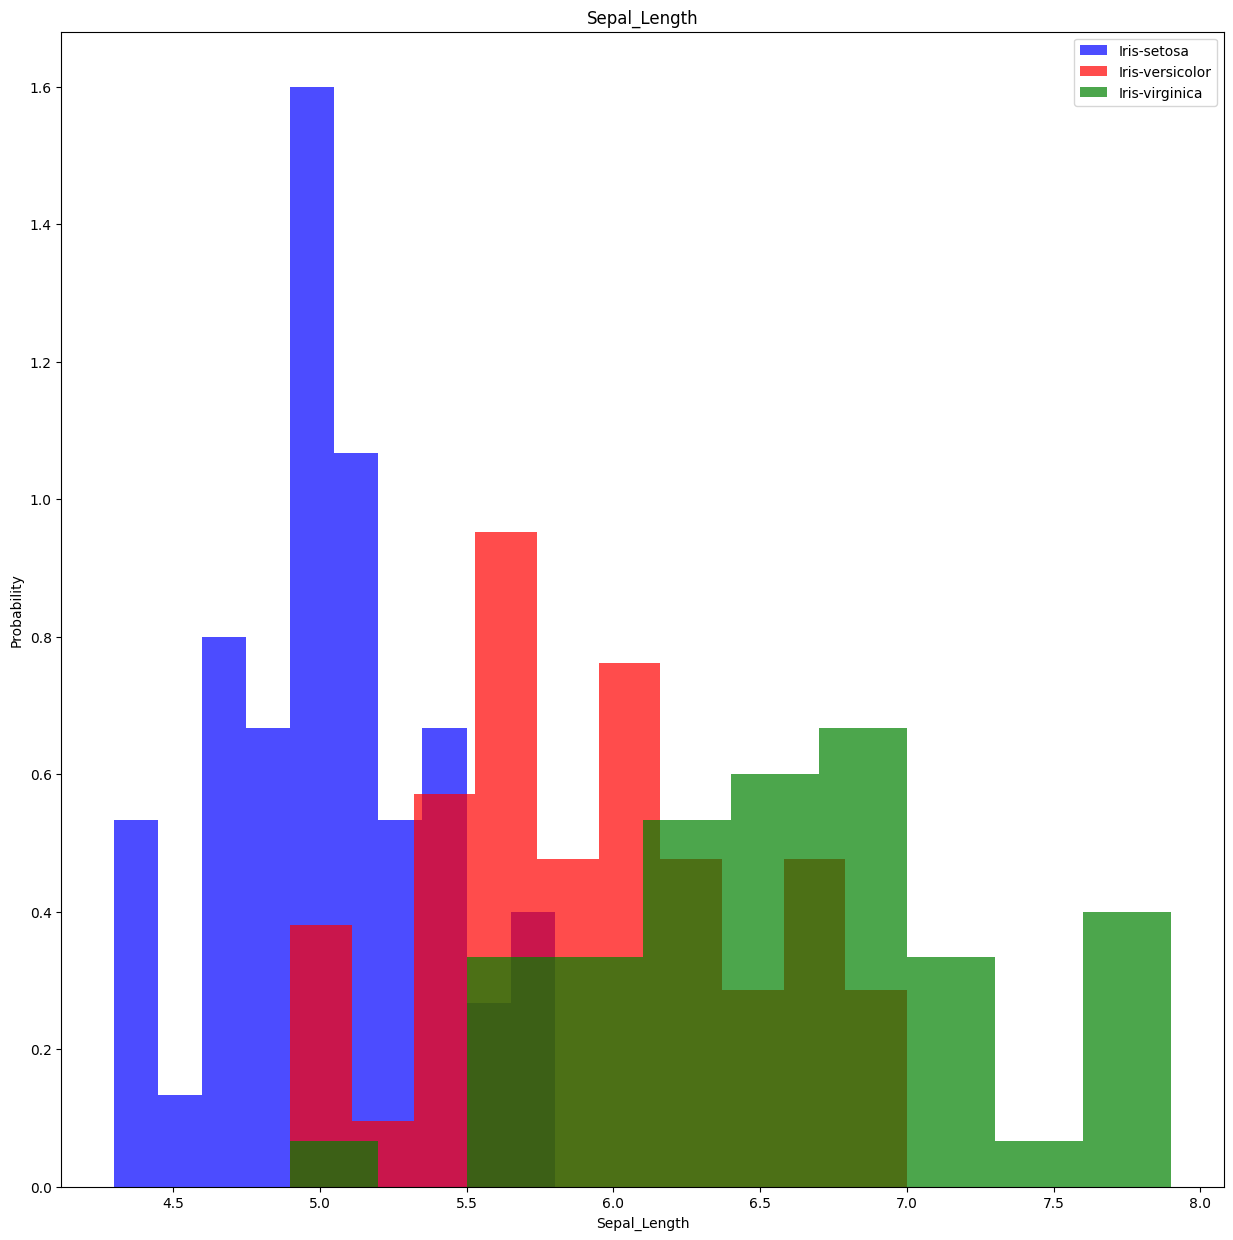

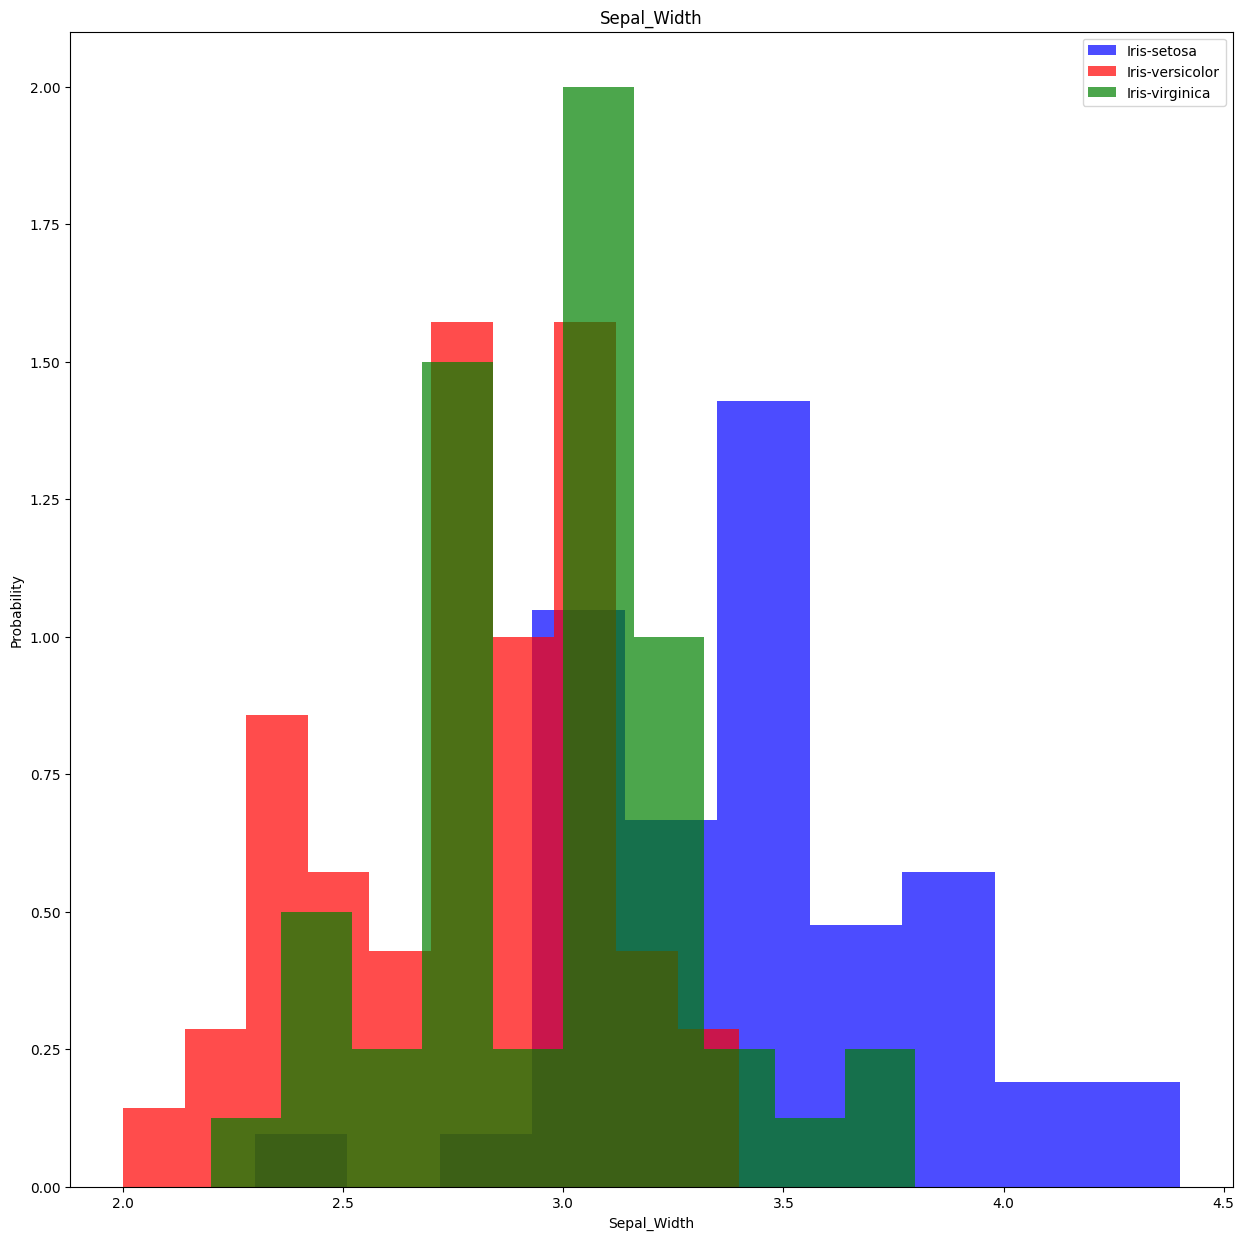

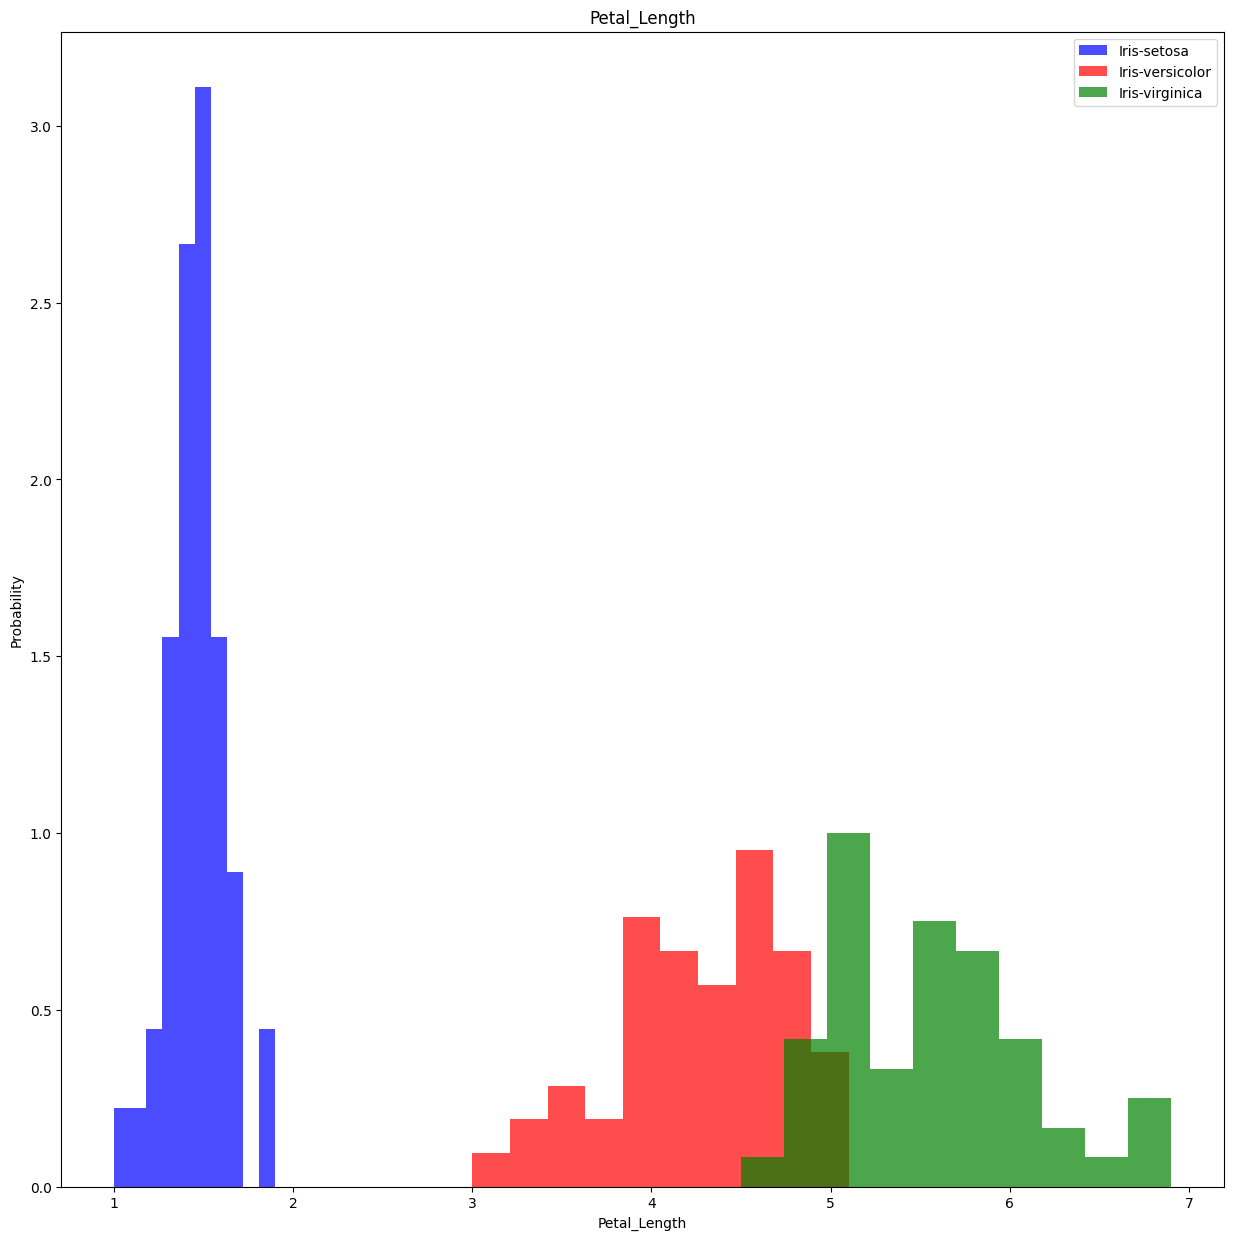

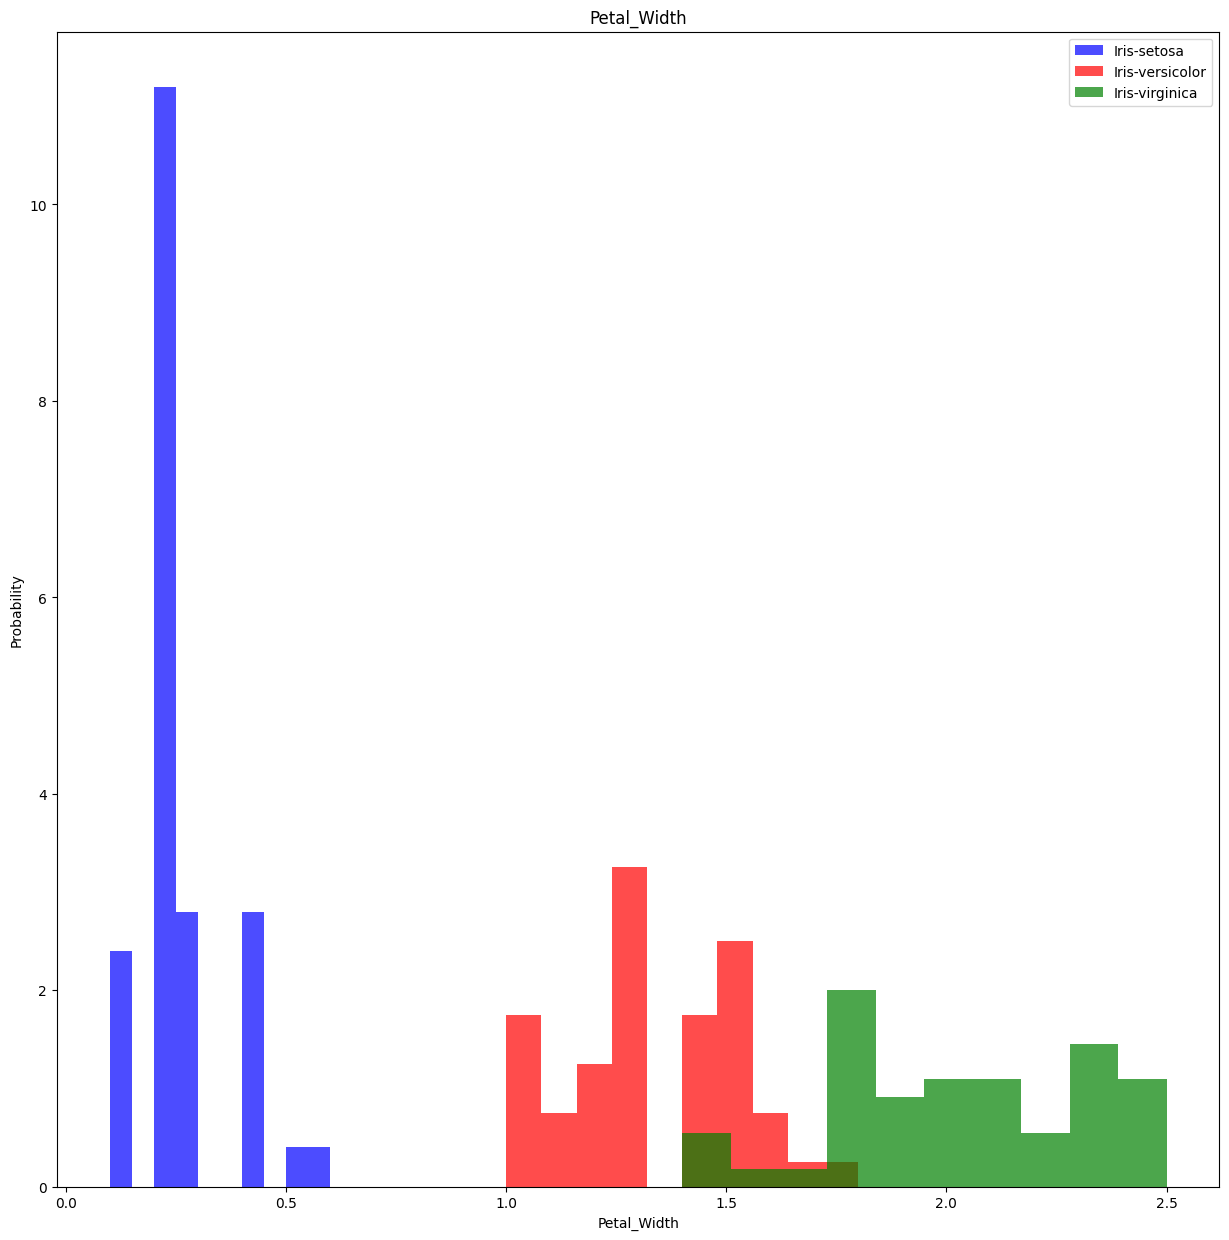

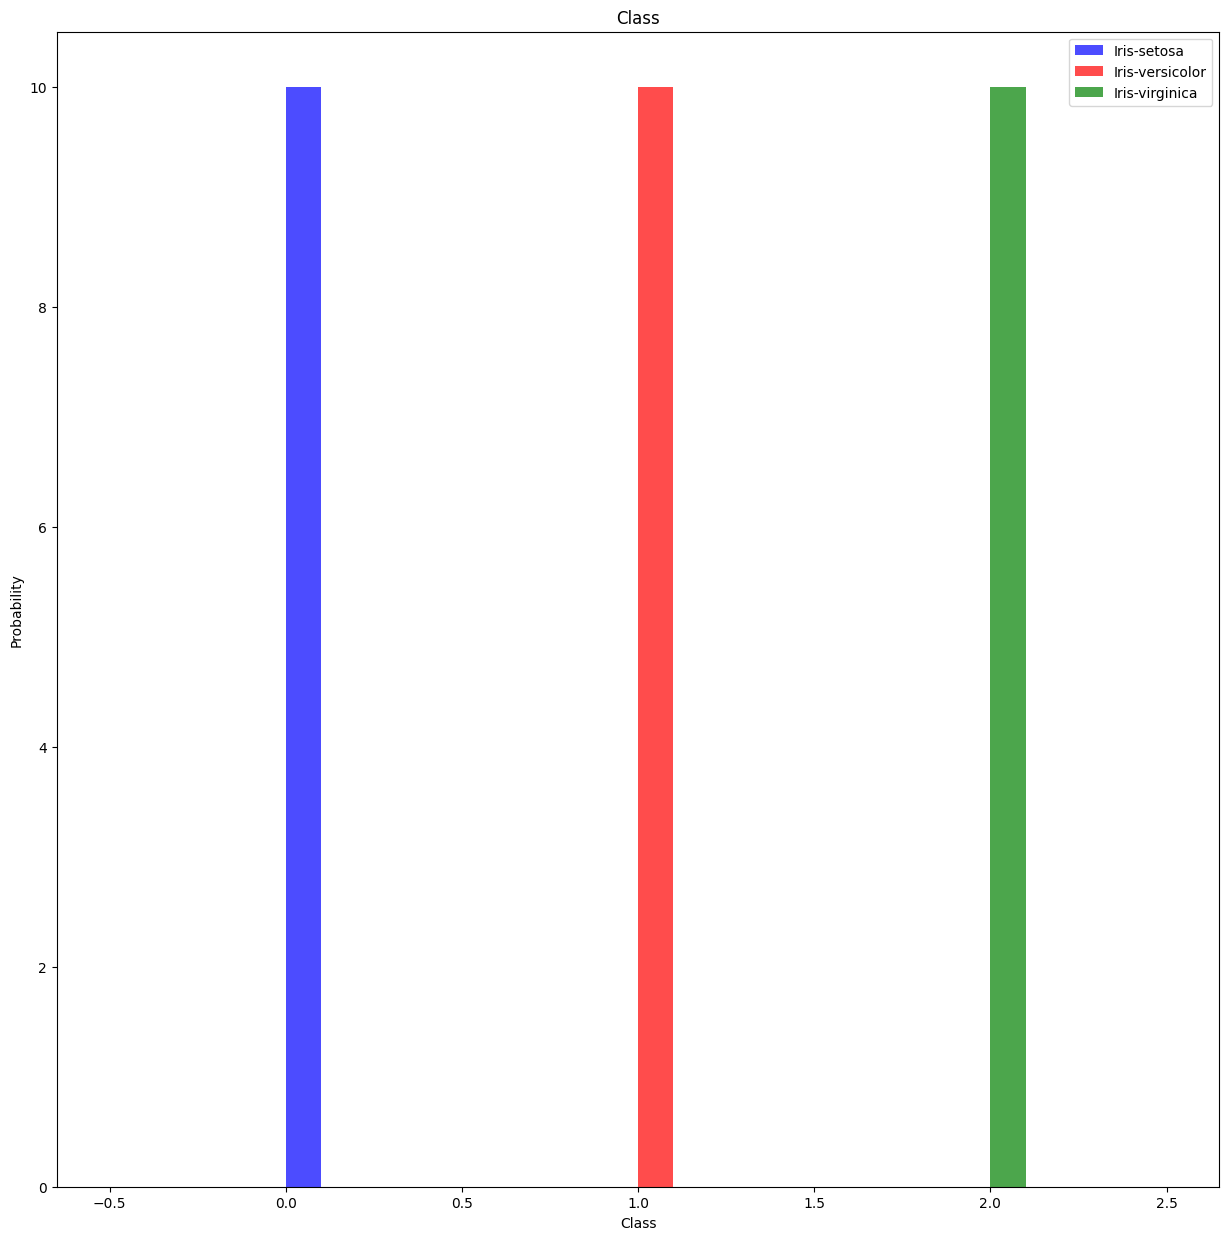

In [ ]:
for label in data[:-1] :
    plt.hist(data[data["Class"]==0][label], color ='blue', label = 'Iris-setosa', alpha=0.7, density= True)
    plt.hist(data[data["Class"]==1][label], color ='red',label = 'Iris-versicolor', alpha=0.7, density= True)
    plt.hist(data[data["Class"]==2][label], color ='green',label = 'Iris-virginica', alpha=0.7, density= True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    #plt.figure(figsize=(12, 6))
    #plt.subplot(1, 2, 1)
    plt.legend()
    plt.show() # This gives us a fair idear of the data



In [ ]:


x , y = data.drop(['Class'],axis =1), data['Class']
# Creating multiple class

In [ ]:
y.unique()

array([0, 1, 2])

In [ ]:
x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Turning data into Tensors since Pytorch the dataframe are in numpy

In [ ]:
x = torch.from_numpy(np.asarray(x)).type(torch.float)
y = torch.from_numpy(np.asarray(y)).type(torch.float)

x[:2],y[:2]

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000]]),
 tensor([0., 0.]))

# Splitting data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.7, random_state=42)

len(xtrain), len(ytrain), len(xtest),len(ytest)

(105, 105, 45, 45)

In [ ]:
# setting up device agnostics

device = 'cuda' if torch.cuda.is_available() else 'cpu' # cuda will be use if avilabla and default to cpu otherewise

In [ ]:
NUM_CLASS = 3
NUM_FEATURES = 4
#RANDOM_SEED = 42

In [ ]:
class multilclass(nn.Module):
  def __init__(self) -> None:
     super(multilclass,self).__init__()
     self.layer_1 = nn.Linear(in_features=NUM_FEATURES, out_features= 25)
     self.layer_2 = nn.Linear(in_features=25, out_features= 10)
     self.layer_3 = nn.Linear(in_features= 10, out_features=3)
     self.relu = nn.ReLU()



  def forward(self,x):
    output = self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    return output

model_A = multilclass().to(device)
model_A


multilclass(
  (layer_1): Linear(in_features=4, out_features=25, bias=True)
  (layer_2): Linear(in_features=25, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
untrained_preds = model_A(xtest.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(ytest)}, Shape: {ytest.shape}")
print(f"\nFirst 11 predictions:\n{untrained_preds[:11]}")
print(f"\nFirst 11 test labels:\n{ytest[:11]}")

Length of predictions: 45, Shape: torch.Size([45, 3])
Length of test samples: 45, Shape: torch.Size([45])

First 11 predictions:
tensor([[ 0.0480, -0.1323,  0.0249],
        [-0.1818, -0.1640,  0.0324],
        [ 0.1198, -0.1564, -0.0348],
        [ 0.0211, -0.1477, -0.0054],
        [ 0.0227, -0.1409, -0.0195],
        [-0.1995, -0.1677, -0.0022],
        [-0.0439, -0.1579, -0.0110],
        [-0.0023, -0.1807, -0.0796],
        [ 0.0042, -0.1491, -0.0479],
        [-0.0117, -0.1426, -0.0077],
        [ 0.0301, -0.1651, -0.0291]], grad_fn=<SliceBackward0>)

First 11 test labels:
tensor([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2.])


# Stting up loss function

In [ ]:
#loss_fn =nn.MultiLabelMarginLoss()
loss_fn = nn.CrossEntropyLoss()

optimizer= torch.optim.Adam(params = model_A.parameters(),
                           lr = 0.01)


In [ ]:
def accuracy_fnn(ytrue, y_pred):
  correct = torch.eq(ytrue, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct/len(y_pred))*100

  return acc

# Creating a training and testing loop for the PyTorch model

In [ ]:
torch.manual_seed(42)

epochs = 700 # number of iterations of training

xtrain, ytrain = xtrain.to(device), ytrain.to(device)

xtest, ytest = xtest.to(device), ytest.to(device)



for epoch in range(epochs):
  model_A.train()

  y_logits = model_A(xtrain)#.squeeze()# output of raw data
  y_pred = torch.softmax(y_logits,dim = 1).argmax(dim = 1) # prediction probabilities
  #y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,ytrain.type(torch.LongTensor))
  acc = accuracy_fnn(ytrue = ytrain.type(torch.LongTensor),
                         y_pred = y_pred.type(torch.LongTensor))

  # 3. optimizer zero grad

  optimizer.zero_grad()
# loss bachward
  loss.backward()

  #5 optimization step
  optimizer.step()

  model_A.eval()

  with torch.inference_mode():
    test_logits = model_A(xtest)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    #test_loss = loss_fn(test_logits,ytest)
    accuracy = accuracy_fnn(ytrue = ytest, y_pred = test_pred)

# print oy=ut the results

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f},  | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.05337,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 50 | Loss: 0.05329,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 100 | Loss: 0.05327,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 150 | Loss: 0.05369,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 200 | Loss: 0.05326,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 250 | Loss: 0.05324,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 300 | Loss: 0.05323,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 350 | Loss: 0.05323,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 400 | Loss: 0.05327,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 450 | Loss: 0.05323,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 500 | Loss: 0.05322,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 550 | Loss: 0.05322,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 600 | Loss: 0.05322,  | Test Loss: 0.01047, Test Acc: 100.00%
Epoch: 650 | Loss: 0.05325,  | Test Loss: 0.01047, Test Acc: 100.00%


In [ ]:
from pathlib import Path
# create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)
# create model save path
MODEL_NAME = "irish_flower_NN"

MODEL_SAVE_PATH =MODEL_PATH/MODEL_NAME


#3. save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')

torch.save(obj = model_A.state_dict(),# only saving the state_dict() only saves the models learned parameters
           f = MODEL_SAVE_PATH)

Saving model to: models/irish_flower_NN
